In [11]:
from pickle import load
import matplotlib.pyplot as plt

In [12]:
acc_pkl = 'validation_accuracy.pkl'
loss_pkl = 'validation_loss.pkl'
with open(acc_pkl, 'rb') as f:
       validation_accuracy  = load(f)

with open(loss_pkl, 'rb') as f:
       validation_loss  = load(f)
print(validation_accuracy.shape)
print(validation_loss.shape)
## snr_loop, ant_loop, bit_loop, epoch

(3, 2, 2, 100)
(3, 2, 2, 100)


In [13]:
SNR_dB = [10, 20, 45]
num_ant = [2, 4]
bit_codebook = [1, 2]
num_epochs = 100

## Accuracy

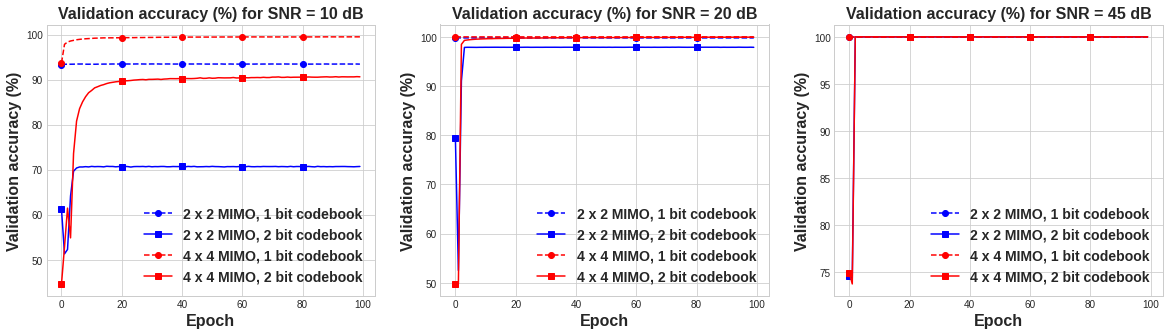

In [14]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=len(SNR_dB), figsize=(20,5))
plt_count = 0
for ss in range(len(SNR_dB)):
    for aa in range(len(num_ant)):
        if num_ant[aa] == 2:
            col = 'blue'
        elif num_ant[aa] == 4:
            col = 'red'
        for bb in range(len(bit_codebook)):
            if bit_codebook[bb] == 1:
                style = '--'
                mark = 'o'
            elif bit_codebook[bb] == 2:
                style = '-'
                mark = 's'
                    
            xax = range(0, num_epochs)
            yax = validation_accuracy[ss, aa, bb, :]
            ax[plt_count].plot(xax,yax, 
                               marker = mark,
                               markevery = 20,
                               color = col, 
                               linestyle = style, 
                               label = f'{num_ant[aa]} x {num_ant[aa]} MIMO, {bit_codebook[bb]} bit codebook')
            
            ax[plt_count].set_title(f'Validation accuracy (%) for SNR = {SNR_dB[ss]} dB', fontsize=16, fontweight="bold")
            ax[plt_count].set_xlabel('Epoch', fontsize=16, fontweight="bold")
            ax[plt_count].set_ylabel('Validation accuracy (%)', fontsize=16, fontweight="bold")
    
    ax[plt_count].legend(prop={"size": 14, "weight": "bold"})
    plt_count += 1

plt.savefig('accuracy.png', dpi=300)
plt.show()

## 

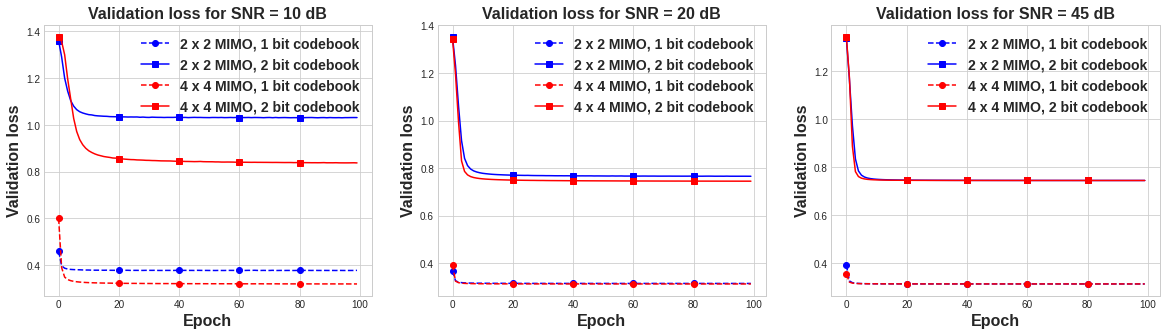

In [16]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=len(SNR_dB), figsize=(20,5))
plt_count = 0
for ss in range(len(SNR_dB)):
    for aa in range(len(num_ant)):
        if num_ant[aa] == 2:
            col = 'blue'
        elif num_ant[aa] == 4:
            col = 'red'
        for bb in range(len(bit_codebook)):
            if bit_codebook[bb] == 1:
                style = '--'
                mark = 'o'
            elif bit_codebook[bb] == 2:
                style = '-'
                mark = 's'
            xax = range(0, num_epochs)
            yax = validation_loss[ss, aa, bb, :]
            ax[plt_count].plot(xax,yax, 
                               marker = mark,
                               markevery = 20,
                               color = col, 
                               linestyle = style, 
                               label = f'{num_ant[aa]} x {num_ant[aa]} MIMO, {bit_codebook[bb]} bit codebook')
            
            ax[plt_count].set_title(f'Validation loss for SNR = {SNR_dB[ss]} dB', fontsize=16, fontweight="bold")
            ax[plt_count].set_xlabel('Epoch', fontsize=16, fontweight="bold")
            ax[plt_count].set_ylabel('Validation loss', fontsize=16, fontweight="bold")
    
    ax[plt_count].legend(prop={"size": 14, "weight": "bold"})
    plt_count += 1

plt.savefig('loss.png', dpi=300)
plt.show()